In [10]:
df_labeled=pd.read_csv('consumer_segmentation_labeled.csv')
df_labeled

,Age,Income,Spending_Score,Gender,Label
0,56,23343,81,Female,Segment_B
1,69,33500,5,Female,Segment_C
2,46,73222,29,Male,Segment_A
3,32,49375,4,Female,Segment_A
4,60,29662,10,Female,Segment_A
...,...,...,...,...,...
495,65,139803,35,Female,Segment_B
496,42,90173,96,Male,Segment_C
497,57,90390,88,Male,Segment_B
498,62,72329,78,Female,Segment_B


In [9]:
df=pd.read_csv('consumer_segmentation_unlabeled.csv')
df

,Age,Income,Spending_Score,Gender
0,56,23343,81,Female
1,69,33500,5,Female
2,46,73222,29,Male
3,32,49375,4,Female
4,60,29662,10,Female
...,...,...,...,...
495,65,139803,35,Female
496,42,90173,96,Male
497,57,90390,88,Male
498,62,72329,78,Female


C:\Users\Vikram\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


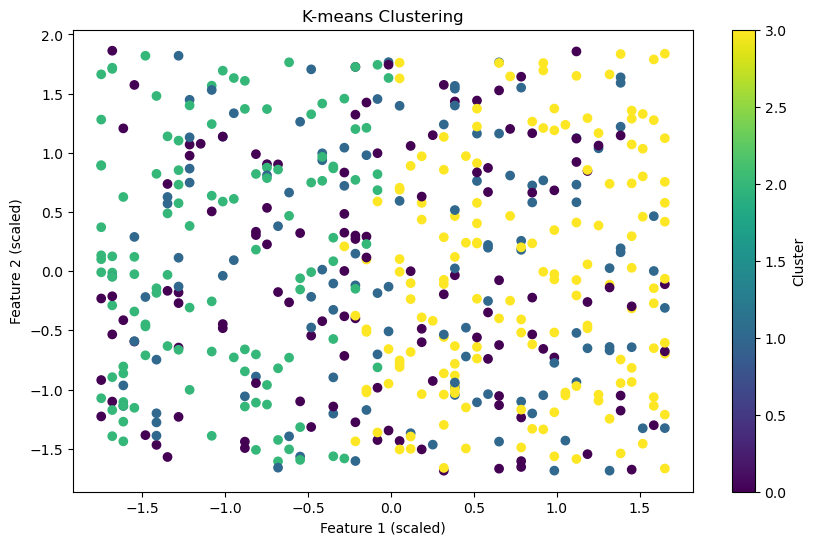

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_unlabeled = pd.read_csv('consumer_segmentation_unlabeled.csv')
df_unlabeled['Gender'] = df_unlabeled['Gender'].map({'Male': 0, 'Female': 1})
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_unlabeled)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
df_unlabeled['Cluster'] = kmeans.labels_

df_unlabeled.to_csv('consumer_segmentation_clustered.csv', index=False)
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [7]:
df_unlabeled

,Age,Income,Spending_Score,Gender,Cluster
0,56,23343,81,1,1
1,69,33500,5,1,1
2,46,73222,29,0,0
3,32,49375,4,1,1
4,60,29662,10,1,1
...,...,...,...,...,...
495,65,139803,35,1,1
496,42,90173,96,0,2
497,57,90390,88,0,0
498,62,72329,78,1,1


In [9]:
df_clustered=pd.read_csv('consumer_segmentation_clustered.csv')
df_clustered

,Age,Income,Spending_Score,Gender,Cluster
0,56,23343,81,1,1
1,69,33500,5,1,1
2,46,73222,29,0,0
3,32,49375,4,1,1
4,60,29662,10,1,1
...,...,...,...,...,...
495,65,139803,35,1,1
496,42,90173,96,0,2
497,57,90390,88,0,0
498,62,72329,78,1,1


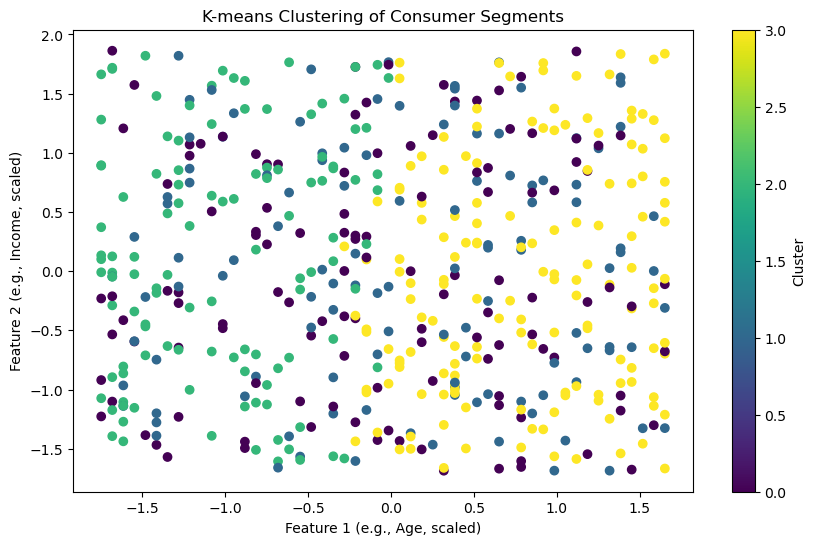

In [12]:
plt.figure(figsize=(10, 6))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.xlabel('Feature 1 (e.g., Age, scaled)')
plt.ylabel('Feature 2 (e.g., Income, scaled)')
plt.title('K-means Clustering of Consumer Segments')

colorbar = plt.colorbar()
colorbar.set_label('Cluster')
plt.show()


   Age  Income  Spending_Score  Gender
0   56   23343              81  Female
1   69   33500               5  Female
2   46   73222              29    Male
3   32   49375               4  Female
4   60   29662              10  Female
              Age        Income  Spending_Score
count  500.000000     500.00000      500.000000
mean    44.220000   81819.44400       48.390000
std     15.036082   36474.51868       28.850556
min     18.000000   20384.00000        1.000000
25%     32.000000   50191.25000       24.750000
50%     45.000000   79566.00000       49.000000
75%     57.000000  112942.00000       72.250000
max     69.000000  149695.00000       99.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             500 non-null    int64 
 1   Income          500 non-null    int64 
 2   Spending_Score  500 non-null    int64 
 3   Gende

C:\Users\Vikram\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Analysis:
         Age        Income  Spending_Score
0  45.361446  83959.313253       23.453815
1  43.087649  79696.625498       73.127490

Cluster Counts:
Cluster
1    250
0    250
Name: count, dtype: int64


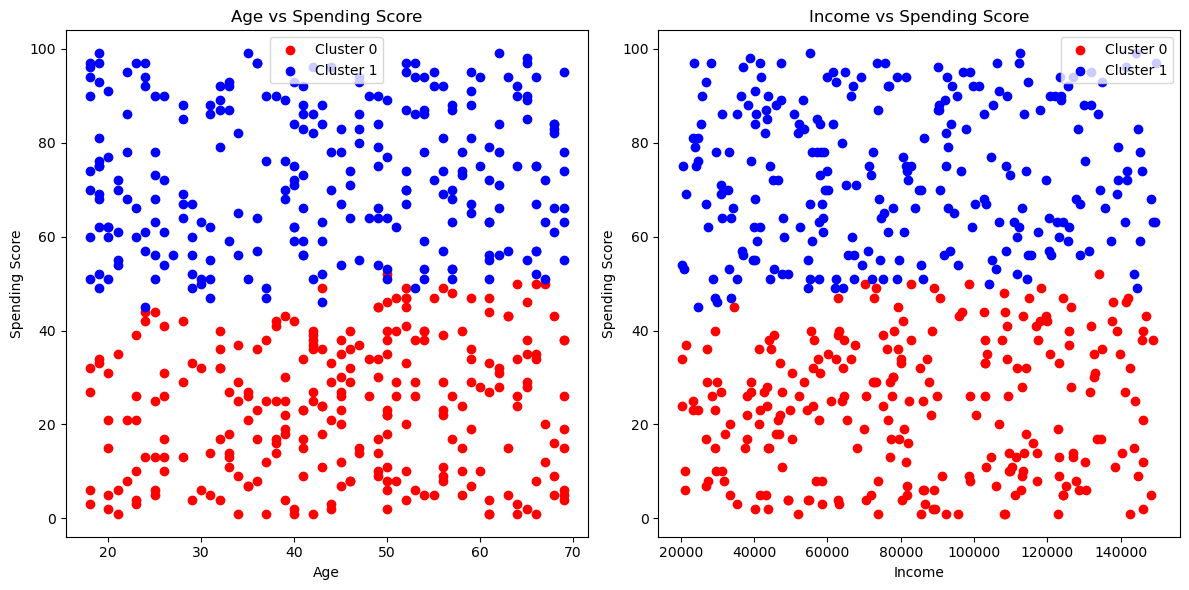

In [6]:
file_path = 'consumer_segmentation_unlabeled.csv'
data = pd.read_csv(file_path)

print(data.head())
print(data.describe())
print(data.info())
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Income', 'Spending_Score']])

kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_analysis = pd.DataFrame(cluster_centers, columns=['Age', 'Income', 'Spending_Score'])
cluster_counts = data['Cluster'].value_counts()

print("Cluster Analysis:")
print(cluster_analysis)
print("\nCluster Counts:")
print(cluster_counts)

plt.figure(figsize=(12, 6))

# Scatter plot for Age vs Spending_Score
plt.subplot(1, 2, 1)
plt.scatter(data[data['Cluster'] == 0]['Age'], data[data['Cluster'] == 0]['Spending_Score'], c='red', label='Cluster 0')
plt.scatter(data[data['Cluster'] == 1]['Age'], data[data['Cluster'] == 1]['Spending_Score'], c='blue', label='Cluster 1')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.legend()

# Scatter plot for Income vs Spending_Score
plt.subplot(1, 2, 2)
plt.scatter(data[data['Cluster'] == 0]['Income'], data[data['Cluster'] == 0]['Spending_Score'], c='red', label='Cluster 0')
plt.scatter(data[data['Cluster'] == 1]['Income'], data[data['Cluster'] == 1]['Spending_Score'], c='blue', label='Cluster 1')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('Income vs Spending Score')
plt.legend()

plt.tight_layout()
plt.show()